In [ ]:
import numpy as np

# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Needed for generating classification, regression and clustering datasets
import sklearn.datasets as dt

# Needed for generating data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV


In [ ]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [ ]:
rand = np.random.RandomState(seed)    

dist_list = ['uniform','normal','exponential','lognormal','chisquare','beta']
param_list = ['-1,1','0,1','1','0,1','2','0.5,0.9']
colors_list = ['green','blue','yellow','cyan','magenta','pink']

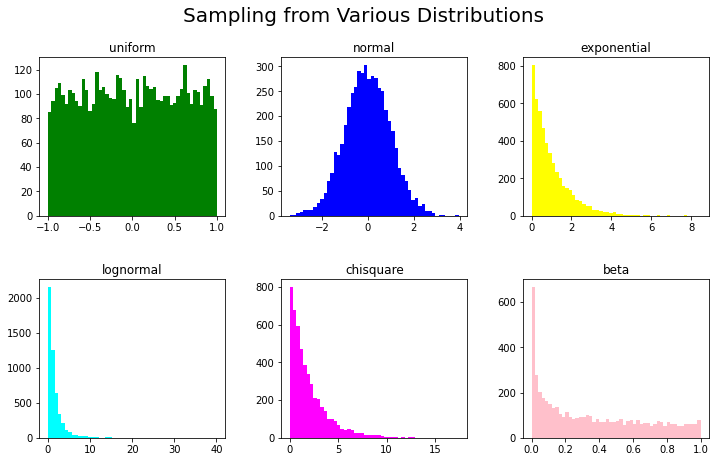

In [ ]:
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(12,7))
plt_ind_list = np.arange(6)+231

for dist, plt_ind, param, colors in zip(dist_list, plt_ind_list, param_list, colors_list):
    x = eval('rand.'+dist+'('+param+',5000)') 
    
    plt.subplot(plt_ind)
    plt.hist(x,bins=50,color=colors)
    plt.title(dist)

fig.subplots_adjust(hspace=0.4,wspace=.3) 
plt.suptitle('Sampling from Various Distributions',fontsize=20)
plt.show()

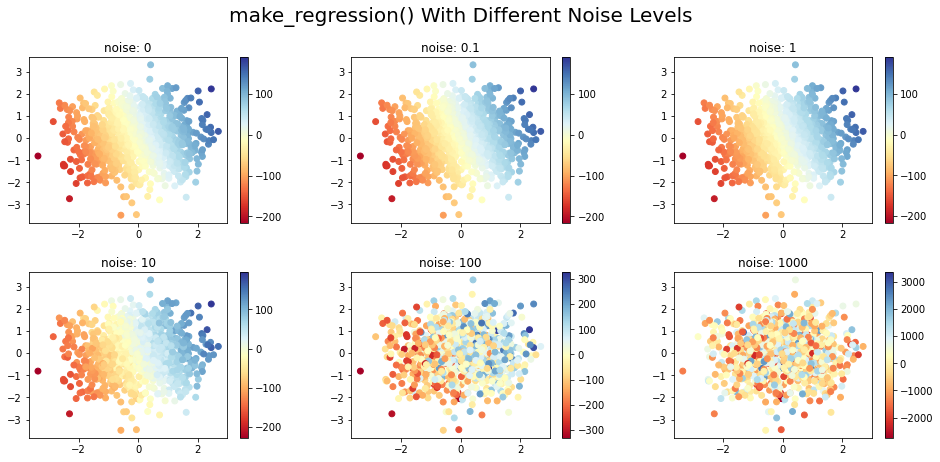

In [ ]:
map_colors = plt.cm.get_cmap('RdYlBu')
fig,ax = plt.subplots(nrows=2, ncols=3,figsize=(16,7))
plt_ind_list = np.arange(6)+231

for noise,plt_ind in zip([0,0.1,1,10,100,1000],plt_ind_list): 
    x,y = dt.make_regression(n_samples=1000,
                             n_features=2,
                             noise=noise,
                             random_state=rand_state) 
    
    plt.subplot(plt_ind)
    my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  s=35,
                                  cmap=color_map)
    
    plt.title('noise: '+str(noise))
    plt.colorbar(my_scatter_plot)
    
fig.subplots_adjust(hspace=0.3,wspace=.3)
plt.suptitle('make_regression() With Different Noise Levels',fontsize=20)
plt.show()

In [ ]:
#SVM : Support vector machines : Supervised Machine Learning Algorithm used for classification and/or regression.

0.9
0.96


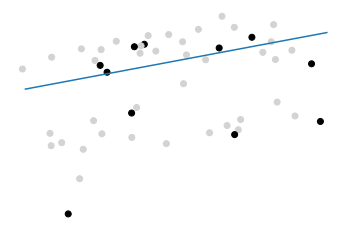

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split

classes = 4
X,t= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)
#%%
X_train, X_test, y_train, y_test= train_test_split(X, t , test_size=0.50)
#%%
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
#%%
model.fit(X_train, y_train)
#%%
y=model.predict(X_test)
y2=model.predict(X_train)
#%%
from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)
#%%
import matplotlib.pyplot as plt
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)

# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();


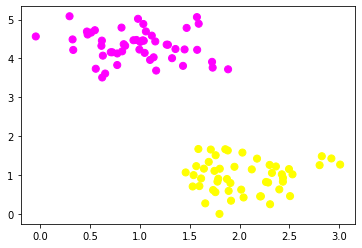

In [ ]:
import seaborn as sns
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs

# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=100, centers=2,
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()



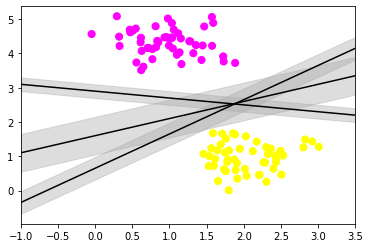

In [ ]:
# creating linspace between -1 to 3.5
xfit = np.linspace(-1, 3.5)

# plotting scatter
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# plot a line between the different sets of data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
	yfit = m * xfit + b
	plt.plot(xfit, yfit, '-k')
	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
	color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()


In [ ]:
#Import standards library
import numpy as np
import matplotlib.pyplot as plt
#Import datest and model selection
from sklearn import svm
from sklearn.datasets import make_blobs
#Creation 40 sepearable points
X, y = make_blobs(n_samples=100, centers=2, random_state=20) 

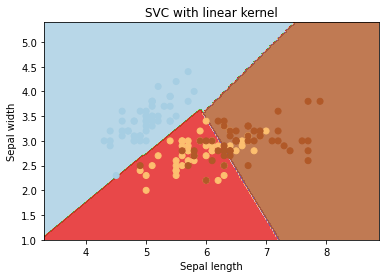

In [ ]:
#linear dataset- apllications : text Classification, as each alphabet is a new feature.

# Import the Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Import some Data from the iris Data Set
iris = datasets.load_iris()

# Take only the first two features of Data.
# To avoid the slicing, Two-Dim Dataset can be used

X = iris.data[:, :2]
y = iris.target

# C is the SVM regularization parameter
C = 1.0

# Create an Instance of SVM and Fit out the data.
# Data is not scaled so as to be able to plot the support vectors
svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)

# create a mesh to plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
		np.arange(y_min, y_max, h))

# Plot the data for Proper Visual Representation
plt.subplot(1, 1, 1)

# Predict the result by giving Data to the model
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

# Output the Plot
plt.show()


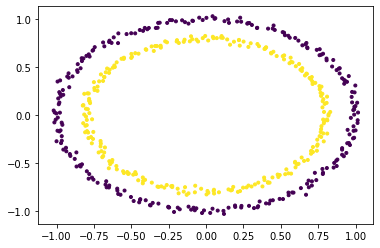

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
  
# generating data
X, Y = make_circles(n_samples = 500, noise = 0.02)
  
# visualizing data
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.')
plt.show()

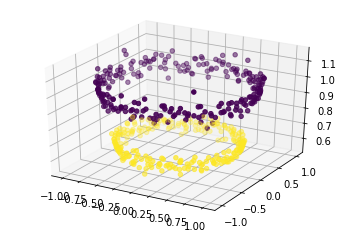

In [ ]:
# adding a new dimension to X
X1 = X[:, 0].reshape((-1, 1))
X2 = X[:, 1].reshape((-1, 1))
X3 = (X1**2 + X2**2)
X = np.hstack((X, X3))

# visualizing data in higher dimension
fig = plt.figure()
axes = fig.add_subplot(111, projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
plt.show()


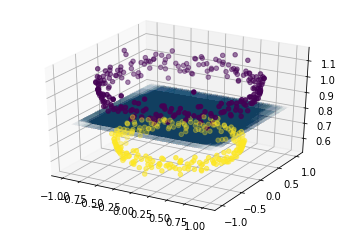

In [ ]:
# create support vector classifier using a linear kernel
from sklearn import svm

svc = svm.SVC(kernel = 'linear')
svc.fit(X, Y)
w = svc.coef_
b = svc.intercept_

# plotting the separating hyperplane
x1 = X[:, 0].reshape((-1, 1))
x2 = X[:, 1].reshape((-1, 1))
x1, x2 = np.meshgrid(x1, x2)
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2]

fig = plt.figure()
axes2 = fig.add_subplot(111, projection = '3d')
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True)
axes1 = fig.gca(projection = '3d')
axes1.plot_surface(x1, x2, x3, alpha = 0.01)
plt.show()


In [ ]:
#advantages Training a SVM with a Linear Kernel is Faster than with any other Kernel.

(100, 5) (100,)
[-8.27199928 -6.47379396 -1.22231408 -2.48358841  0.29714976] 1
[-6.38526816 -6.75016865 -2.61117528 -3.08653646  1.57086292] 1
[-1.13898357  3.26214848 -9.19585147 -3.90678125 -7.25145196] 0
[-2.16402577  4.56652694 -9.12154358 -3.6377136  -9.0870834 ] 0
[-10.29569483  -7.10496464  -2.63716951  -0.96047619   0.49459841] 1
[-2.33022219  4.78405366 -9.87589123 -2.82386464 -5.8659643 ] 0
[-7.52303243 -6.68964267 -2.63683942 -3.6438068  -0.0522933 ] 1
[-6.60986899 -5.51599011 -2.20387664 -2.94193203 -0.09145254] 1
[ -0.91900345   3.45278927 -10.26393101  -3.920734    -8.4379995 ] 0
[-1.45772973  5.06751016 -8.20555429 -4.07381312 -8.29800292] 0


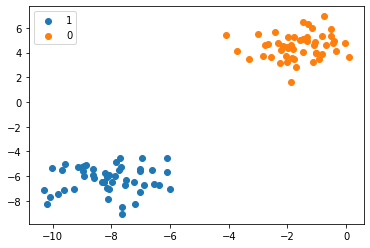

In [ ]:
# example of binary classification task
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
# define dataset
#n_features=3 by default the feature =2 
X, y = make_blobs(n_samples=100, centers=2,n_features=5, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
#print(counter)
# summarize first few examples

for i in range(10):
	print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

[0 1]


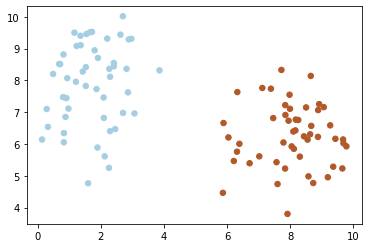

In [ ]:
#Import standards library
import numpy as np
import matplotlib.pyplot as plt
#Import datest and model selection
from sklearn import svm
from sklearn.datasets import make_blobs
#Creation 40 sepearable points
X, y = make_blobs(n_samples=100, centers=2, random_state=20)

#Fit the model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1], c=y, s=30, cmap=plt.cm.Paired)
#plt.show()
#Predict unknown data
newData = [[3,4],[5,6]]
print(clf.predict(newData))


In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.50, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [ ]:
cm

array([[21,  0],
       [ 0, 29]])

In [ ]:
from sklearn.metrics import accuracy_score  
acc= accuracy_score(y_test, y_pred)  

In [ ]:
acc*100

100.0

In [ ]:
from sklearn.metrics import classification_report  
report=classification_report(y_test, y_pred)  

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

